<a href="https://colab.research.google.com/github/Vittal-Rao/aiml-internship-tasks/blob/main/covid19tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload `covid_sample_data.csv`


Saving covid_sample_data.csv to covid_sample_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('covid_sample_data.csv')
print(df.head())
print(df.columns)


         date       location  total_cases  new_cases  total_deaths  \
0  2020-03-01         Brazil       681155        960         38258   
1  2020-03-02  United States       531430       4526         22062   
2  2020-03-03         Brazil       339365        869          2533   
3  2020-03-04          India       224176       4655         19869   
4  2020-03-05          India       927040        574         25758   

   total_tests  people_vaccinated  
0       767975              54886  
1       585561             191335  
2       354676             103355  
3       262869             203004  
4      1021518             384681  
Index(['date', 'location', 'total_cases', 'new_cases', 'total_deaths',
       'total_tests', 'people_vaccinated'],
      dtype='object')


In [3]:
countries = ['India', 'United States', 'Brazil']
df = df[df['location'].isin(countries)]


In [4]:
df['date'] = pd.to_datetime(df['date'])


In [5]:
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'total_tests', 'people_vaccinated']]
df.fillna(0, inplace=True)  # Replace missing values with 0


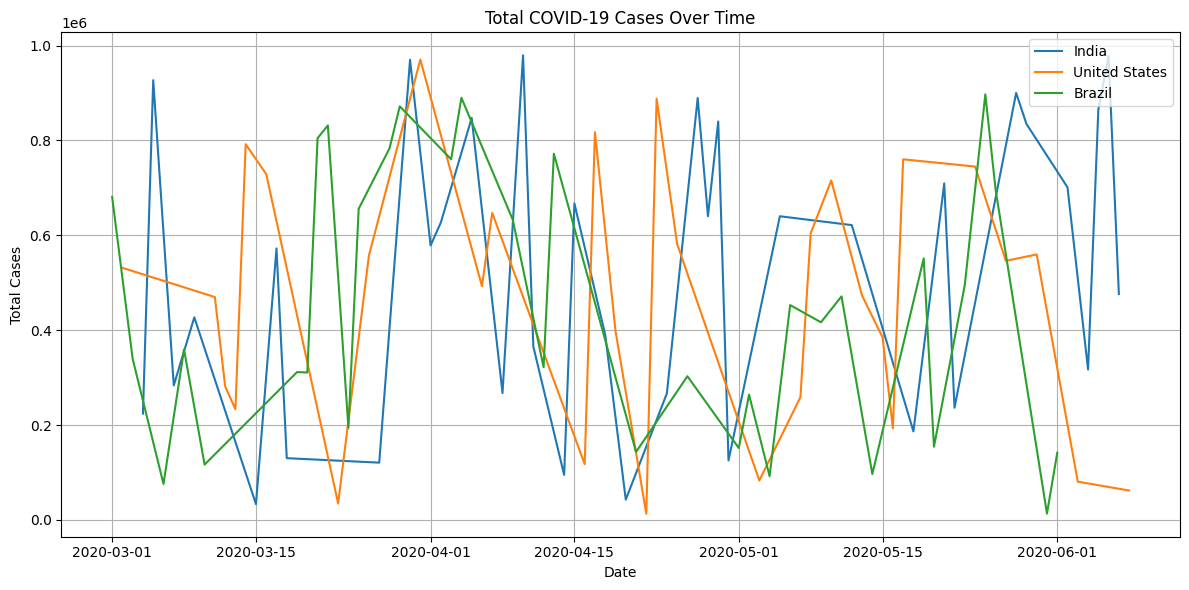

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


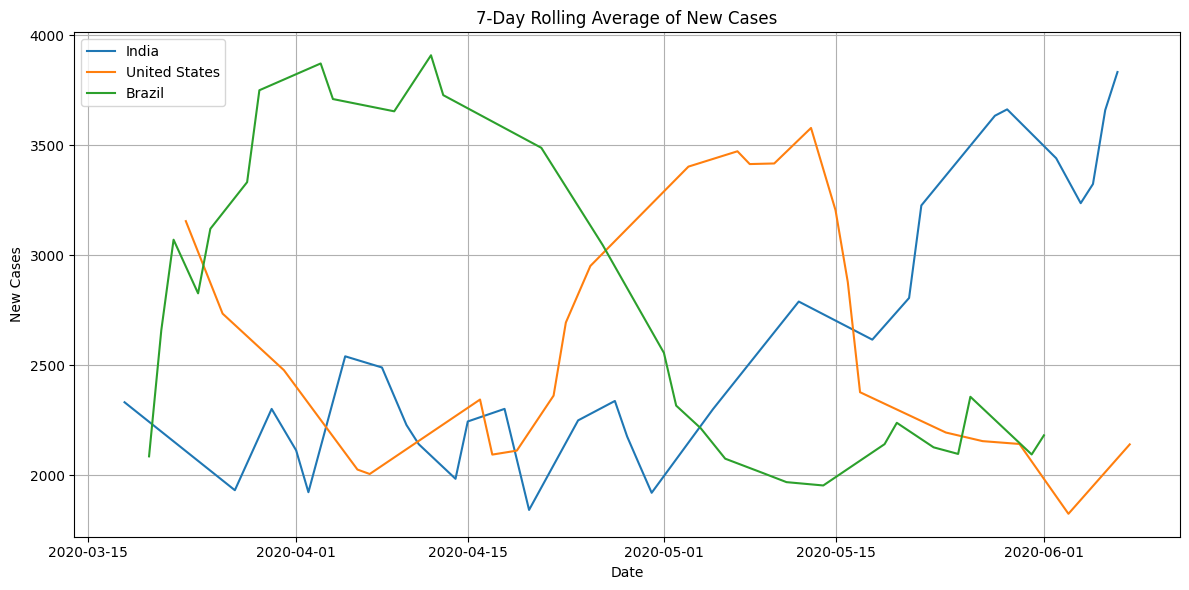

In [7]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'].rolling(7).mean(), label=country)

plt.title('7-Day Rolling Average of New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
